# Lab 2: Small-World Network (Refer to Lecture 7) 
Generate a regular network with N = 1000 nodes with degree 10. You may use either 
the Watts-Strogatz model [3] (by rewiring the edges randomly) or the Newman-
Watts model [4] (by adding random edges). 

I am going to use the Watts-Strogatz model in this Lab.

In [55]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from functools import partial as part
from multiprocessing import Pool
import random

style.use("seaborn")

wsg = nx.watts_strogatz_graph

/tmp/ipykernel_1193/3733058349.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn")


## (a) Compute the average shortest distance L and average clustering coefficient C as a function of p, 
where p is the portion of rewired or added edges compared to the total number of initial edges. 

In [56]:
def aspl_estim(g: nx.Graph, nsample=10):
    """Average shortest path length estimate with random sampling method"""
    N = g.number_of_nodes()
    spls = []
    for _ in range(nsample):
        ps = nx.shortest_path_length(g, source=random.randint(0, N-1))
        spls.append(np.mean(tuple(ps.values())))
    return np.mean(spls)

def LC4WSG(N=1000,K=10,p=0,seed=5054,nsample=10):
    g = wsg(N,K,p,seed)
    C = nx.average_clustering(g)
    L = aspl_estim(g,nsample) if nsample else nx.average_shortest_path_length(g)
    return L,C

The function `aspl_estim` is same as in the [`Lab1`](https://algebra-fun.github.io/DDM-Coursework/MSDM5056/Lab/Lab1.html), which is used to compute average shortest path length using random sampling in order to save computing time.

In [58]:
LC4WSG(N=1000,K=10,p=.5,nsample=False)

(3.3849709709709708, 0.09651314796314847)

## (b) Make a plot of L and C against p, then compare your plot with Fig. 1 below. 
( You need to repeat (a) at least a few times for each p and take the average in 
order to get a smooth curve.) 

In [66]:
def AvgLC4WSG(N=1000,K=10,p=0,seed=5054,trails=20):
    Ls,Cs = zip(*map(part(LC4WSG,N,K,p),range(seed,seed+trails)))
    return Ls,Cs

Using multiprocessing to accelerate.

In [67]:
N, K = 1000, 10
ps = np.logspace(-4, 0)
with Pool() as pool:
    Ls, Cs = zip(*pool.map(part(AvgLC4WSG, N, K), ps))
L = np.array(Ls)
L0=N/K/2
C = np.array(Cs)
C0=3/4*(K-2)/(K-1)
rL = L/L0
rC = C/C0
rLavg, rLstd = np.mean(rL, axis=1), np.std(rL, axis=1)
rCavg, rCstd = np.mean(rC, axis=1), np.std(rC, axis=1)


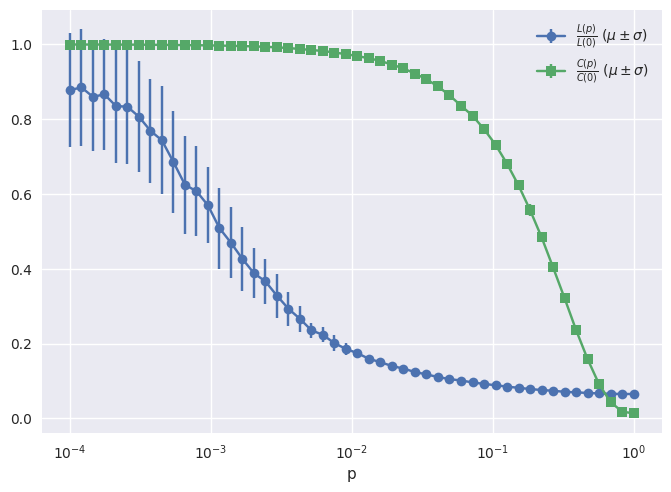

In [68]:
plt.xscale("log")
plt.xlabel("p")
plt.errorbar(ps,rLavg,yerr=rLstd,label=r"$\frac{L(p)}{L(0)}$ ($\mu\pm\sigma$)",marker="o")
plt.errorbar(ps,rCavg,yerr=rCstd,label=r"$\frac{C(p)}{C(0)}$ ($\mu\pm\sigma$)",marker="s")
plt.legend()
plt.show()